<a href="https://colab.research.google.com/github/ATIK2110018/ML_projects/blob/main/feni_flood_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv("/content/drive/MyDrive/GIS data/feni_flood_research/df_5000.csv")

In [43]:
df.shape

(5000, 12)

In [44]:
df.head()

,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood
0,10.0,218.342468,2.0,16.0,0.0,0.350566,4.291700,0.493467,373.500000,30.00000,0.000000,1.0
1,9.0,166.048477,2.0,16.0,0.0,0.000000,4.291700,0.500000,375.700151,0.00000,5044.376465,0.0
2,9.0,218.342468,2.0,16.0,0.0,0.000000,4.291700,0.500000,373.500000,30.00000,0.000000,0.0
3,9.0,164.872559,3.0,1.0,5.0,2.888425,4.596104,0.659629,374.500000,1520.85498,0.000000,0.0
4,10.0,175.080338,2.0,32.0,3.0,2.452491,4.249122,0.605101,374.000000,360.00000,4179.003418,0.0


In [45]:
# df = df.rename(columns={'twi_1': 'drainage_den'})

In [46]:
df['twi']=df['twi'].fillna(0)
df['river_dist']=df['river_dist'].fillna(df['river_dist'].mean)
df['elevation']=df['elevation'].fillna(df['elevation'].mean)
df['precipitation']=df['precipitation'].fillna(df['precipitation'].mean)
df['lulc']=df['lulc'].fillna(1)
df['flow_dir']=df['flow_dir'].fillna(2)
df['slope']=df['slope'].fillna(df['slope'].mean)
df['flow_accu']=df['flow_accu'].fillna(df['flow_accu'].mean)
df['ndvi']=df['ndvi'].fillna(df['ndvi'].mean)
df['drainage_den']=df['drainage_den'].fillna(df['drainage_den'].mean)
df['flood']=df['flood'].fillna(0)

In [47]:
df.isnull().sum()

,0
elevation,0
precipitation,0
lulc,0
flow_dir,0
flow_accu,0
slope,0
twi,0
ndvi,0
permeability,0
river_dist,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      5000 non-null   float64
 1   precipitation  5000 non-null   float64
 2   lulc           5000 non-null   float64
 3   flow_dir       5000 non-null   float64
 4   flow_accu      5000 non-null   float64
 5   slope          5000 non-null   float64
 6   twi            5000 non-null   float64
 7   ndvi           5000 non-null   float64
 8   permeability   5000 non-null   float64
 9   river_dist     5000 non-null   float64
 10  drainage_den   5000 non-null   float64
 11  flood          5000 non-null   float64
dtypes: float64(12)
memory usage: 468.9 KB


In [49]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

print(df.dtypes)

Index([], dtype='object')
elevation        float64
precipitation    float64
lulc             float64
flow_dir         float64
flow_accu        float64
slope            float64
twi              float64
ndvi             float64
permeability     float64
river_dist       float64
drainage_den     float64
flood            float64
dtype: object


In [50]:
# df.drop(columns=["CID", "POINT_X", "POINT_Y"], inplace=True)

In [51]:
df.head()

,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood
0,10.0,218.342468,2.0,16.0,0.0,0.350566,4.291700,0.493467,373.500000,30.00000,0.000000,1.0
1,9.0,166.048477,2.0,16.0,0.0,0.000000,4.291700,0.500000,375.700151,0.00000,5044.376465,0.0
2,9.0,218.342468,2.0,16.0,0.0,0.000000,4.291700,0.500000,373.500000,30.00000,0.000000,0.0
3,9.0,164.872559,3.0,1.0,5.0,2.888425,4.596104,0.659629,374.500000,1520.85498,0.000000,0.0
4,10.0,175.080338,2.0,32.0,3.0,2.452491,4.249122,0.605101,374.000000,360.00000,4179.003418,0.0


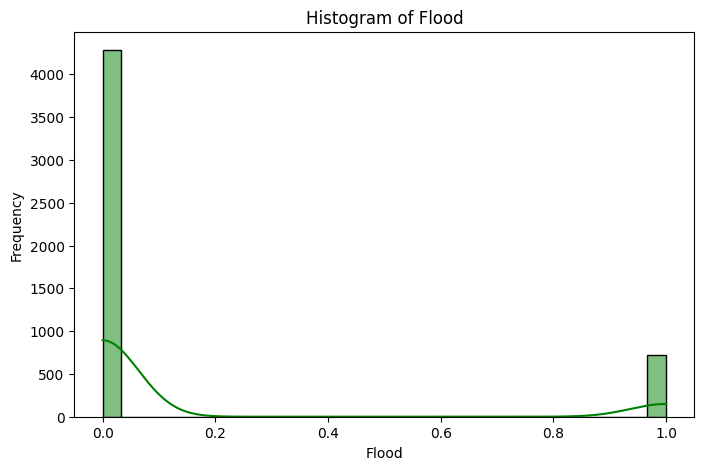

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df['flood'], bins=30, kde=True, color='green')
plt.xlabel("Flood")
plt.ylabel("Frequency")
plt.title("Histogram of Flood")
plt.show()

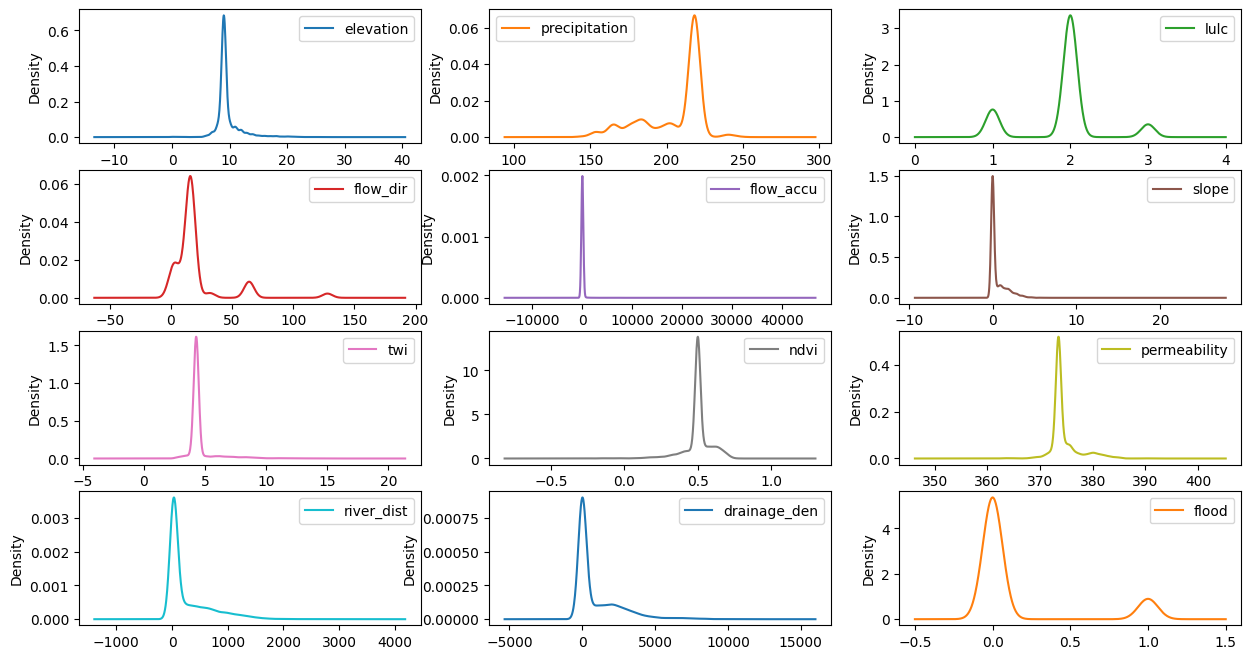

In [53]:
df.plot(kind='density',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

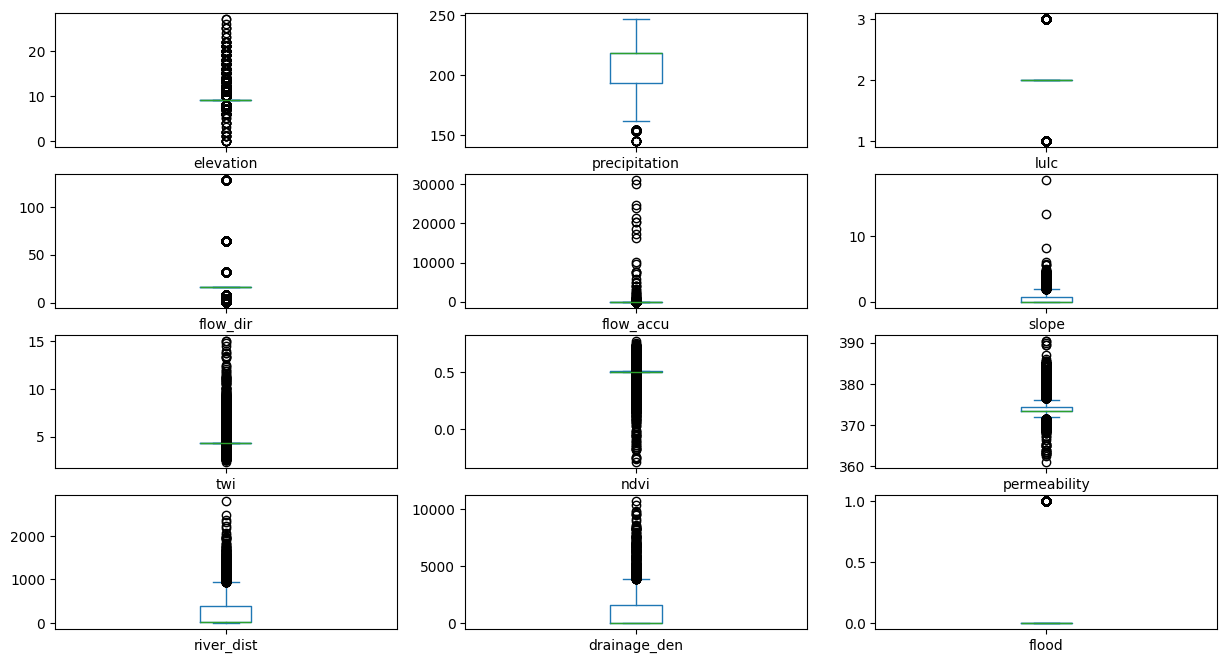

In [54]:
df.plot(kind='box',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

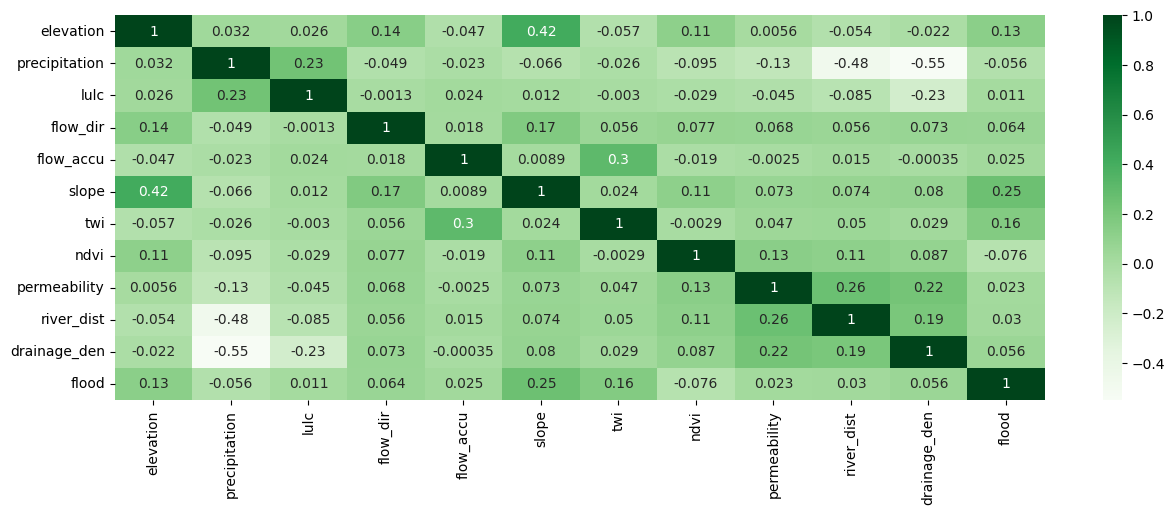

In [55]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [56]:
x = df.drop(columns=['flood'])

In [57]:
y=df['flood']

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [59]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(random_state=42)
x, y= smote.fit_resample(x, y)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=115, max_depth=30, class_weight="balanced", random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=115,
                       random_state=42)

In [63]:
model.predict(x_test)

array([1., 0., 1., ..., 1., 1., 0.])

In [64]:
model.score(x_train,y_train)

1.0

In [65]:
model.score(x_test,y_test)

0.9054842473745625

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(x_test)

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🎯 ROC-AUC Score:")
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))


📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       850
         1.0       0.87      0.96      0.91       864

    accuracy                           0.91      1714
   macro avg       0.91      0.91      0.91      1714
weighted avg       0.91      0.91      0.91      1714


📊 Confusion Matrix:
[[723 127]
 [ 35 829]]

🎯 ROC-AUC Score:
ROC-AUC: 0.9799114923747276
